### Business Problem:

A Retail store is required to analyze the day-to-day transactions and keep a track of its customers  spread across various locations along with their purchases/returns across various categories. 

Create a report and display the below calculated metrics, reports and inferences. 


### Importing Libraries

In [1]:
import numpy as np
import pandas as pd

In [2]:
from matplotlib import pyplot as plt
import seaborn as sns

### Importing the data

In [3]:
customer = pd.read_csv('Customer.csv', sep=',')
customer.head()

,customer_Id,DOB,Gender,city_code
0,268408,02-01-1970,M,4.0
1,269696,07-01-1970,F,8.0
2,268159,08-01-1970,F,8.0
3,270181,10-01-1970,F,2.0
4,268073,11-01-1970,M,1.0


In [4]:
txn = pd.read_csv('Transactions.csv', sep=',')
txn.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop


In [6]:
product = pd.read_csv('prod_cat_info.csv', sep=',')
product.head()

,prod_cat_code,prod_cat,prod_sub_cat_code,prod_subcat
0,1,Clothing,4,Mens
1,1,Clothing,1,Women
2,1,Clothing,3,Kids
3,2,Footwear,1,Mens
4,2,Footwear,3,Women


#### Shape of all the three data sets:

In [7]:
customer.shape

(5647, 4)

In [8]:
txn.shape

(23053, 10)

In [9]:
product.shape

(23, 4)

### Ques1.
Merge the datasets Customers, Product Hierarchy and Transactions as Customer_Final. Ensure to
keep all customers who have done transactions with us and select the join type accordingly.


In [10]:
# Step 1: Merge Customer & txn Dfs on the basis of customer_ID and cust_id and create customer_txn

cust_txn = pd.merge(left = customer, right = txn, 
                    left_on =['customer_Id'], right_on=['cust_id'])

In [11]:
cust_txn.head(2)

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,268408,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop
1,268408,02-01-1970,M,4.0,16197868036,268408,16-12-2013,1,4,-5,-210,110.250,-1160.250,Flagship store


In [12]:
# Renaming cols in the product Df

product.rename(columns = {'prod_sub_cat_code': 'prod_subcat_code'}, inplace=True)

In [13]:
product.head()

,prod_cat_code,prod_cat,prod_subcat_code,prod_subcat
0,1,Clothing,4,Mens
1,1,Clothing,1,Women
2,1,Clothing,3,Kids
3,2,Footwear,1,Mens
4,2,Footwear,3,Women


In [14]:
#Step 2: Merge customer_txn & product df on the basis of prod_cat_code & prod_subcat_code table & create customer_final:

customer_final = pd.merge(left = cust_txn, right = product,
                         on = ['prod_cat_code', 'prod_subcat_code'])

In [15]:
customer_final.shape

(23053, 16)

In [16]:
customer_final.head(2)

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat
0,268408,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,Books,Fiction
1,275152,16-01-1970,M,4.0,73109425404,275152,25-03-2011,7,5,2,464,97.440,1025.440,e-Shop,Books,Fiction


In [17]:
## Converting DOB and tran_date to DateTime dtype

customer_final.DOB = pd.to_datetime(customer_final.DOB, format = '%d-%m-%Y')

In [18]:
customer_final.DOB 

0       1970-01-02
1       1970-01-16
2       1970-01-18
3       1970-01-22
4       1970-01-29
           ...    
23048   1992-12-04
23049   1992-12-09
23050   1992-12-15
23051   1992-12-15
23052   1992-12-15
Name: DOB, Length: 23053, dtype: datetime64[ns]

In [19]:
customer_final.tran_date = pd.to_datetime(customer_final.tran_date, format ='%d-%m-%Y', exact=False, errors='ignore')
customer_final.tran_date = pd.to_datetime(customer_final.tran_date, format = '%d/%m/%Y', exact=False, errors='ignore')
customer_final.tran_date = customer_final.tran_date.apply(pd.to_datetime, errors='coerce')

In [20]:
customer_final.tran_date = pd.to_datetime(customer_final.tran_date, format = '%d/%m/%Y', exact=False, errors='ignore')

In [21]:
customer_final.tran_date = customer_final.tran_date.apply(pd.to_datetime, errors='coerce')

In [22]:
customer_final.tran_date

0       2014-01-13
1       2011-03-25
2       2011-05-23
3       2013-09-12
4       2013-05-23
           ...    
23048   2012-10-10
23049   2013-08-17
23050   2012-01-02
23051   2011-01-31
23052   2011-01-26
Name: tran_date, Length: 23053, dtype: datetime64[ns]

In [23]:
# checking for null values
customer_final.isnull().sum()

customer_Id         0
DOB                 0
Gender              9
city_code           8
transaction_id      0
cust_id             0
tran_date           0
prod_subcat_code    0
prod_cat_code       0
Qty                 0
Rate                0
Tax                 0
total_amt           0
Store_type          0
prod_cat            0
prod_subcat         0
dtype: int64

In [24]:
# checking for duplicates

customer_final[customer_final.duplicated()==True]

# returns True if duplicate or else False

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat
2661,269016,1983-03-12,F,8.0,63833750229,269016,2013-09-19,10,6,-3,-460,144.900,-1524.900,TeleShop,Home and kitchen,Kitchen
5083,273106,1970-03-23,F,2.0,426787191,273106,2012-05-28,1,2,-5,-109,57.225,-602.225,e-Shop,Footwear,Mens
5489,272584,1979-12-20,M,2.0,93088859112,272584,2012-04-11,1,2,-1,-1168,122.640,-1290.640,e-Shop,Footwear,Mens
7637,267939,1985-03-18,F,1.0,43292728137,267939,2011-03-07,4,4,-2,-739,155.190,-1633.190,e-Shop,Bags,Women
9519,270330,1981-07-13,M,3.0,48727689115,270330,2012-10-21,4,3,-4,-1158,486.360,-5118.360,TeleShop,Electronics,Mobiles
12760,274656,1987-02-03,M,5.0,54818572958,274656,2013-07-19,11,6,-5,-662,347.550,-3657.550,e-Shop,Home and kitchen,Bath
13301,273937,1975-11-19,M,5.0,95523406151,273937,2012-09-16,8,3,-5,-483,253.575,-2668.575,e-Shop,Electronics,Personal Appliances
13917,266852,1990-01-15,M,5.0,4170892941,266852,2011-12-21,8,3,-1,-412,43.260,-455.260,MBR,Electronics,Personal Appliances
14640,270202,1985-07-18,F,9.0,42255136382,270202,2012-08-25,12,5,-4,-841,353.220,-3717.220,e-Shop,Books,Academic
16967,274748,1991-06-22,M,1.0,44125492691,274748,2011-12-19,3,2,-5,-767,402.675,-4237.675,e-Shop,Footwear,Women


In [25]:
customer_final[customer_final.transaction_id == 63833750229]

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat
2660,269016,1983-03-12,F,8.0,63833750229,269016,2013-09-19,10,6,-3,-460,144.9,-1524.9,TeleShop,Home and kitchen,Kitchen
2661,269016,1983-03-12,F,8.0,63833750229,269016,2013-09-19,10,6,-3,-460,144.9,-1524.9,TeleShop,Home and kitchen,Kitchen
2662,269016,1983-03-12,F,8.0,63833750229,269016,2013-09-17,10,6,3,460,144.9,1524.9,TeleShop,Home and kitchen,Kitchen


In [26]:
customer_final = customer_final.drop_duplicates()

In [27]:
customer_final[customer_final.duplicated()==True]

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat


--------------------------------------------

### 2. Prepare a summary report for the merged data set.
a. Get the column names and their corresponding data types

In [28]:
customer_final.dtypes

customer_Id                  int64
DOB                 datetime64[ns]
Gender                      object
city_code                  float64
transaction_id               int64
cust_id                      int64
tran_date           datetime64[ns]
prod_subcat_code             int64
prod_cat_code                int64
Qty                          int64
Rate                         int64
Tax                        float64
total_amt                  float64
Store_type                  object
prod_cat                    object
prod_subcat                 object
dtype: object

### b. Top/Bottom 10 observations

In [29]:
customer_final.head(10)

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat
0,268408,1970-01-02,M,4.0,87243835584,268408,2014-01-13,7,5,5,187,98.175,1033.175,TeleShop,Books,Fiction
1,275152,1970-01-16,M,4.0,73109425404,275152,2011-03-25,7,5,2,464,97.440,1025.440,e-Shop,Books,Fiction
2,275034,1970-01-18,F,4.0,64777271023,275034,2011-05-23,7,5,2,197,41.370,435.370,Flagship store,Books,Fiction
3,270829,1970-01-22,F,8.0,87174343938,270829,2013-09-12,7,5,4,1141,479.220,5043.220,e-Shop,Books,Fiction
4,267657,1970-01-29,F,7.0,76242744953,267657,2013-05-23,7,5,4,1020,428.400,4508.400,e-Shop,Books,Fiction
5,274630,1970-02-01,M,4.0,78357345891,274630,2012-11-04,7,5,1,646,67.830,713.830,TeleShop,Books,Fiction
6,273541,1970-02-01,M,4.0,23916816961,273541,2013-09-02,7,5,4,410,172.200,1812.200,e-Shop,Books,Fiction
7,269008,1970-02-13,F,6.0,35560569829,269008,2013-09-03,7,5,1,1441,151.305,1592.305,e-Shop,Books,Fiction
8,269008,1970-02-13,F,6.0,94033312891,269008,2012-04-26,7,5,5,746,391.650,4121.650,MBR,Books,Fiction
9,267199,1970-02-14,NaN,2.0,56749259881,267199,2012-11-01,7,5,4,1049,440.580,4636.580,MBR,Books,Fiction


In [30]:
customer_final.tail(10)

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat
23043,268914,1992-11-15,F,3.0,1407823655,268914,2011-10-06,10,5,1,1252,131.460,1383.460,MBR,Books,Non-Fiction
23044,269519,1992-11-17,M,9.0,29719500605,269519,2013-12-24,10,5,4,1036,435.120,4579.120,TeleShop,Books,Non-Fiction
23045,273524,1992-11-25,F,1.0,25762805863,273524,2012-11-19,10,5,1,1401,147.105,1548.105,Flagship store,Books,Non-Fiction
23046,272141,1992-12-02,F,10.0,71337087467,272141,2012-07-22,10,5,-3,-1422,447.930,-4713.930,e-Shop,Books,Non-Fiction
23047,272141,1992-12-02,F,10.0,71337087467,272141,2012-07-16,10,5,3,1422,447.930,4713.930,e-Shop,Books,Non-Fiction
23048,267812,1992-12-04,F,1.0,63540378797,267812,2012-10-10,10,5,3,224,70.560,742.560,TeleShop,Books,Non-Fiction
23049,274618,1992-12-09,F,7.0,71793203305,274618,2013-08-17,10,5,4,691,290.220,3054.220,Flagship store,Books,Non-Fiction
23050,268097,1992-12-15,F,7.0,91217108818,268097,2012-01-02,10,5,2,411,86.310,908.310,e-Shop,Books,Non-Fiction
23051,268097,1992-12-15,F,7.0,90114483354,268097,2011-01-31,10,5,-4,-1408,591.360,-6223.360,e-Shop,Books,Non-Fiction
23052,268097,1992-12-15,F,7.0,90114483354,268097,2011-01-26,10,5,4,1408,591.360,6223.360,e-Shop,Books,Non-Fiction


### c. “Five-number summary” for continuous variables (min, Q1, median, Q3 and max)


In [31]:
customer_final.Qty.describe()

count    23040.000000
mean         2.435764
std          2.264326
min         -5.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: Qty, dtype: float64

In [32]:
customer_final.Rate

0         187
1         464
2         197
3        1141
4        1020
         ... 
23048     224
23049     691
23050     411
23051   -1408
23052    1408
Name: Rate, Length: 23040, dtype: int64

In [33]:
customer_final.Tax

0         98.175
1         97.440
2         41.370
3        479.220
4        428.400
          ...   
23048     70.560
23049    290.220
23050     86.310
23051    591.360
23052    591.360
Name: Tax, Length: 23040, dtype: float64

In [35]:
customer_final.total_amt

0        1033.175
1        1025.440
2         435.370
3        5043.220
4        4508.400
           ...   
23048     742.560
23049    3054.220
23050     908.310
23051   -6223.360
23052    6223.360
Name: total_amt, Length: 23040, dtype: float64

### d. Frequency tables for all the categorical variables

In [36]:
customer_final.select_dtypes('object').head(2)

,Gender,Store_type,prod_cat,prod_subcat
0,M,TeleShop,Books,Fiction
1,M,e-Shop,Books,Fiction


In [37]:
# Using value_counts for Gender:

customer_final.Gender.value_counts()

M    11804
F    11227
Name: Gender, dtype: int64

In [38]:
# Using value_counts for Store_type:

customer_final.Store_type.value_counts()

e-Shop            9304
MBR               4660
Flagship store    4575
TeleShop          4501
Name: Store_type, dtype: int64

In [40]:
# Using value_counts for prod_cat:

customer_final.prod_cat.value_counts()

Books               6066
Electronics         4895
Home and kitchen    4126
Footwear            2996
Clothing            2960
Bags                1997
Name: prod_cat, dtype: int64

In [41]:
# Using value_counts for prod_subcat:

customer_final.prod_subcat.value_counts()

Women                  3046
Mens                   2910
Kids                   1997
Tools                  1061
Fiction                1043
Kitchen                1036
Children               1035
Comics                 1030
Mobiles                1030
Bath                   1022
Furnishing             1007
Non-Fiction            1003
DIY                     989
Cameras                 985
Personal Appliances     970
Academic                966
Computers               958
Audio and video         952
Name: prod_subcat, dtype: int64

In [42]:
# Using pd.crossTab  for Gender:

pd.crosstab(index=customer_final['Gender'], columns = 'count').add_suffix('_Of_Gender').reset_index()

col_0,Gender,count_Of_Gender
0,F,11227
1,M,11804


In [43]:
# Using pd.crossTab for Store_Type:

pd.crosstab(index=customer_final['Store_type'], columns='count').add_suffix('_Of_Store_Type').reset_index()

col_0,Store_type,count_Of_Store_Type
0,Flagship store,4575
1,MBR,4660
2,TeleShop,4501
3,e-Shop,9304


In [44]:
# Using pd.crossTab for Prod_cat:

pd.crosstab(index=customer_final['prod_cat'], columns='count').add_suffix('_Of_Prod_Cat').reset_index()

col_0,prod_cat,count_Of_Prod_Cat
0,Bags,1997
1,Books,6066
2,Clothing,2960
3,Electronics,4895
4,Footwear,2996
5,Home and kitchen,4126


In [45]:
# Using pd.crossTab for Prod_Subcat:

pd.crosstab(index=customer_final['prod_subcat'], columns='count').add_suffix('_Of_Prod_Subcat').reset_index()

col_0,prod_subcat,count_Of_Prod_Subcat
0,Academic,966
1,Audio and video,952
2,Bath,1022
3,Cameras,985
4,Children,1035
5,Comics,1030
6,Computers,958
7,DIY,989
8,Fiction,1043
9,Furnishing,1007


--------------------------------------------

### 3. Generate histograms for all continuous variables and frequency bars for categorical variables.



In [46]:
customer_final.select_dtypes('int64').head(2)

,customer_Id,transaction_id,cust_id,prod_subcat_code,prod_cat_code,Qty,Rate
0,268408,87243835584,268408,7,5,5,187
1,275152,73109425404,275152,7,5,2,464


In [47]:
customer_final.select_dtypes('float64').head(2)

,city_code,Tax,total_amt
0,4.0,98.175,1033.175
1,4.0,97.440,1025.440


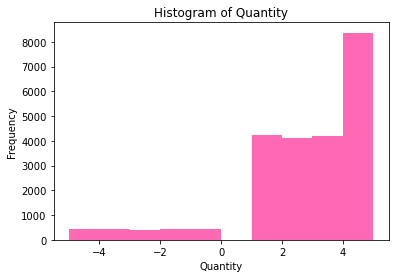

In [48]:
# Histogram for Qty

customer_final.Qty.plot(kind='hist', color='hotpink')
plt.title('Histogram of Quantity')
plt.xlabel('Quantity')
plt.show()

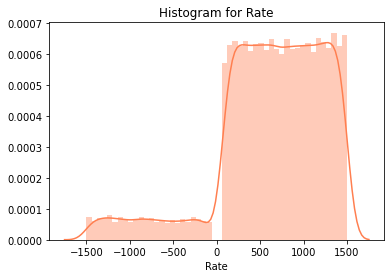

In [277]:
# Histogram for Rate

sns.distplot(customer_final.Rate, color='coral')
plt.title('Histogram for Rate')
plt.show()

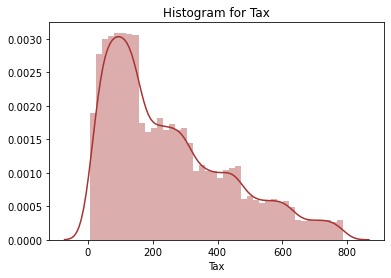

In [278]:
# Histogram for Tax
sns.distplot(customer_final.Tax , color='#a83232')
plt.title('Histogram for Tax')
plt.show()

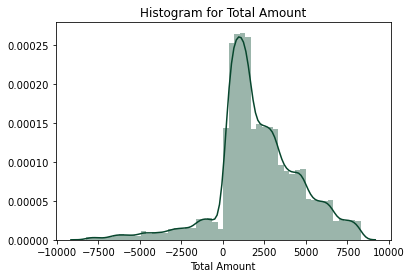

In [279]:
# Histogram for Total_amt

sns.distplot(customer_final.total_amt, color='#07462d')
plt.title('Histogram for Total Amount')
plt.xlabel('Total Amount')
plt.show()

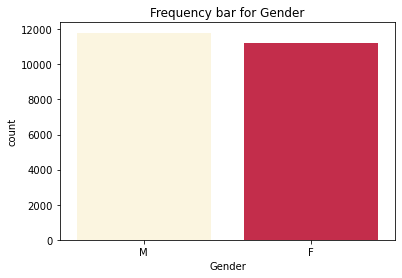

In [280]:
# Frequency bar for Gender:

sns.countplot(customer_final.Gender, palette=['#FFF8DC','#DC143C'])
plt.title('Frequency bar for Gender')
plt.show()

In [57]:
sns.set(color_codes=True,context='notebook',style='darkgrid',palette='deep',font='sans-serif')

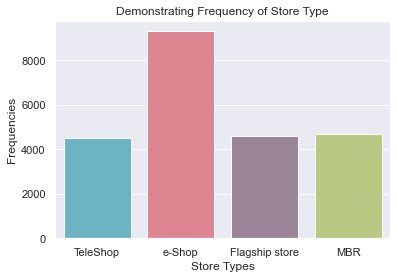

In [58]:
# Frequency bar for Store_Type:
sns.countplot(customer_final.Store_type, palette=['#5dbcd2','#ec7788','#9f819b','#bed578'])
plt.title('Demonstrating Frequency of Store Type')
plt.xlabel('Store Types')
plt.ylabel('Frequencies')
plt.show()

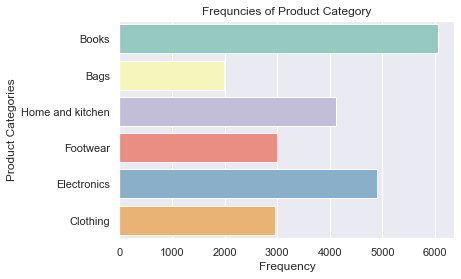

In [60]:
# Frequency bar for Prod_cat:

sns.countplot(y=customer_final.prod_cat, palette='Set3')
plt.title('Frequncies of Product Category')
plt.ylabel('Product Categories')
plt.xlabel('Frequency')
plt.show()

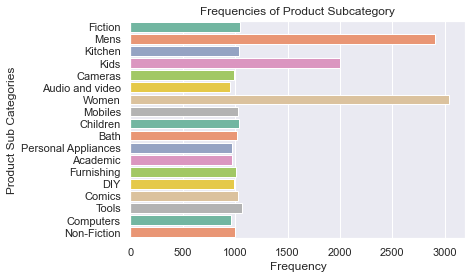

In [61]:
# Frequency bar for Prod_Subcat:

sns.countplot(y=customer_final.prod_subcat, palette = 'Set2')
plt.title('Frequencies of Product Subcategory')
plt.ylabel('Product Sub Categories')
plt.xlabel('Frequency')
plt.show()

--------------------------------------------

### 4. Calculate the following information using the merged dataset :
a. Time period of the available transaction data


In [62]:
max_date = customer_final.tran_date.max()
max_date

Timestamp('2014-12-02 00:00:00')

In [63]:
min_date = customer_final.tran_date.min()
min_date

Timestamp('2011-01-02 00:00:00')

In [64]:
max_date.date

<function Timestamp.date>

In [65]:
max_Date = pd.Timestamp.strftime(max_date, format = '%d-%m-%Y')
min_Date = pd.Timestamp.strftime(min_date, format = '%d-%m-%Y')

In [306]:
print("The time period of the available transaction data is from", max_Date,'to',min_Date,'.')

The time period of the available transaction data is from 02-12-2014 to 02-01-2011 .


### b. Count of transactions where the total amount of transaction was negative

In [66]:
count = customer_final.loc[customer_final.total_amt<0].shape[0]
count

2164

In [67]:
customer_final.loc[customer_final.total_amt<0].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2164 entries, 10 to 23051
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customer_Id       2164 non-null   int64         
 1   DOB               2164 non-null   datetime64[ns]
 2   Gender            2163 non-null   object        
 3   city_code         2164 non-null   float64       
 4   transaction_id    2164 non-null   int64         
 5   cust_id           2164 non-null   int64         
 6   tran_date         2164 non-null   datetime64[ns]
 7   prod_subcat_code  2164 non-null   int64         
 8   prod_cat_code     2164 non-null   int64         
 9   Qty               2164 non-null   int64         
 10  Rate              2164 non-null   int64         
 11  Tax               2164 non-null   float64       
 12  total_amt         2164 non-null   float64       
 13  Store_type        2164 non-null   object        
 14  prod_cat          2164

In [68]:
print('The number of transactions where the total amount of transaction is negative is',count,'.')

The number of transactions where the total amount of transaction is negative is 2164 .


--------------------------------------------

### 5. Analyze which product categories are more popular among females vs male customers.


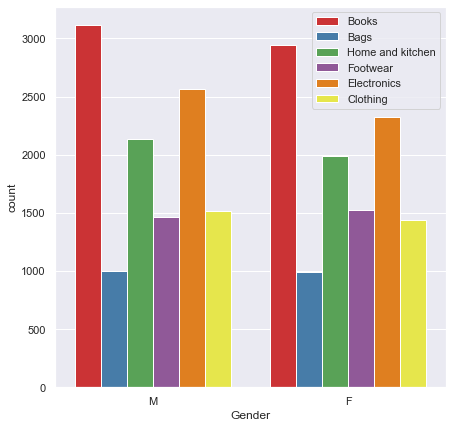

In [53]:
plt.figure(figsize=(7,7))
sns.countplot(x='Gender', hue='prod_cat',data = customer_final, palette='Set1')
plt.legend()
plt.show()

In [69]:
pd.crosstab(index=customer_final['Gender'], columns=customer_final['prod_cat'])

prod_cat,Bags,Books,Clothing,Electronics,Footwear,Home and kitchen
Gender,,,,,,
F,993,2946,1439,2328,1528,1993
M,1004,3116,1518,2567,1467,2132


In [70]:
pd.crosstab(index=customer_final['Gender'], columns=customer_final['prod_cat'], 
            values=customer_final['Qty'], aggfunc=len)

prod_cat,Bags,Books,Clothing,Electronics,Footwear,Home and kitchen
Gender,,,,,,
F,993,2946,1439,2328,1528,1993
M,1004,3116,1518,2567,1467,2132


In [71]:
print('Among both Male and Female customers Books is the more popular product category')

Among both Male and Female customers Books is the more popular product category


--------------------------------------------

### 6. Which City code has the maximum customers and what was the percentage of customers from that city?


In [72]:
# checking for the city code with maximum customers

city = customer_final.city_code.value_counts().head(1)
city

4.0    2422
Name: city_code, dtype: int64

In [73]:
# calculating the % of customer from City code with max customers
res = round(city[4]/len(customer_final.customer_Id)*100,2)
res

10.51

In [74]:
print("The City code with maximum customers is 4 and the percentage of customers from that city is:",res,'%')

The City code with maximum customers is 4 and the percentage of customers from that city is: 10.51 %


--------------------------------------------

### 7. Which store type sells the maximum products by value and by quantity?

In [75]:
customer_final.groupby(['Store_type'])[['Rate','Qty']].sum().reset_index()

,Store_type,Rate,Qty
0,Flagship store,2942874,11142
1,MBR,2953665,11195
2,TeleShop,2836359,10993
3,e-Shop,5945770,22790


In [76]:
print('e-shop is the StoreType that sells maximum products both by value and by quantity.')

e-shop is the StoreType that sells maximum products both by value and by quantity.


--------------------------------------------

### 8. What was the total amount earned from the "Electronics" and "Clothing" categories from Flagship Stores?


In [77]:
store_prod = pd.crosstab(index=customer_final['Store_type'], columns=customer_final['prod_cat'],
            values=customer_final['total_amt'], aggfunc=np.sum, margins=True).round(2)

store_prod

prod_cat,Bags,Books,Clothing,Electronics,Footwear,Home and kitchen,All
Store_type,,,,,,,
Flagship store,870548.83,2493677.81,1194423.23,2215136.04,1234806.56,1713004.15,9721596.62
MBR,848678.68,2496039.20,1287686.34,2107969.83,1112163.72,1822403.57,9674941.32
TeleShop,789181.06,2545714.47,1241834.36,1978457.19,1235719.29,1581227.38,9372133.74
e-Shop,1617933.27,5297161.15,2527193.57,4429142.77,2643215.25,3327977.12,19842623.13
All,4126341.83,12832592.63,6251137.49,10730705.83,6225904.81,8444612.22,48611294.81


In [78]:
store_prod.loc['Flagship store',['Clothing','Electronics']].sum()

3409559.27

In [79]:
print('The total amount earned from the Electronics and Clothing categories from Flagship Stores is 3409559.27.')

The total amount earned from the Electronics and Clothing categories from Flagship Stores is 3409559.27.


--------------------------------------------

### 9. What was the total amount earned from "Male" customers under the "Electronics" category?

In [80]:
pd.crosstab(index=customer_final['Gender'], columns=customer_final['prod_cat'], 
            values=customer_final['total_amt'], aggfunc=np.sum, margins=True).round(2)

prod_cat,Bags,Books,Clothing,Electronics,Footwear,Home and kitchen,All
Gender,,,,,,,
F,2079618.84,6174590.83,3026750.8,5019354.21,3203155.21,4133702.23,23637172.13
M,2046722.99,6645972.78,3224079.5,5711351.62,3020200.36,4305169.51,24953496.75
All,4126341.83,12820563.60,6250830.3,10730705.83,6223355.58,8438871.74,48590668.88


In [81]:
print('The total amount earned from Male customers under the Electronics category is 5711351.62.')

The total amount earned from Male customers under the Electronics category is 5711351.62.


--------------------------------------------

### 10. How many customers have more than 10 unique transactions, after removing all transactions which have any negative amounts?

In [88]:
# step 1: creating df with positive transaction amount:
txn_ = customer_final.loc[customer_final.total_amt>0,:]

In [116]:
# step 2: grouping on the basis of customer_Id and counting their transactions

g_txn = txn_.groupby(['customer_Id'])[['transaction_id']].count().reset_index()
g_txn

,customer_Id,transaction_id
0,266783,4
1,266784,3
2,266785,7
3,266788,4
4,266794,11
...,...,...
5501,275257,4
5502,275261,3
5503,275262,2
5504,275264,2


In [119]:
# step 3: from grouped transactions, check for the customers having more than 10 unique transactions

g_txn[g_txn['transaction_id']>10].reset_index(drop=True)

,customer_Id,transaction_id
0,266794,11
1,270535,11
2,270803,11
3,272741,11
4,273014,11
5,274227,11


In [120]:
print("There are 6 customers with 11 unique transactions.")

There are 6 customers with 11 unique transactions.


--------------------------------------------

### 11. For all customers aged between 25 - 35, find out:

In [147]:
### finding the customers between age group 25-35

# step 1: find the current year

import datetime as dt

today_date = dt.datetime.now().date()
today_date

#step 2 : Convert to Pandas' understandable format

current_date = pd.to_datetime(today_date)
current_date


# step 3: find out the age

age_in_days = (current_date - customer_final.DOB)

# step 4: convert the age_in_days from timedelta[64] to int 

age = age_in_days.dt.days


customer_final['Age'] = round(age/365.25)

### a. What was the total amount spent for “Electronics” and “Books” product categories?

In [177]:
# creating df by filtersing on rows with age b/w 25 to 35:

age_25_35 = customer_final.loc[(customer_final.Age > 25) & (customer_final.Age <35),:].reset_index(drop=True)

In [180]:
age_25_35.head(3)

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,Age
0,268590,1986-02-15,F,7.0,6979985894,268590,2013-01-23,7,5,1,128,13.44,141.44,MBR,Books,Fiction,34.0
1,268590,1986-02-15,F,7.0,44613575638,268590,2012-12-25,7,5,4,347,145.74,1533.74,TeleShop,Books,Fiction,34.0
2,268590,1986-02-15,F,7.0,48414048504,268590,2011-08-05,7,5,1,140,14.70,154.70,TeleShop,Books,Fiction,34.0


In [218]:
# Way 1: Grouping over Product category

res1 = age_25_35.groupby(['prod_cat'])[['total_amt']].sum()
res1

,total_amt
prod_cat,
Bags,1207176.035
Books,3673697.365
Clothing,2083332.745
Electronics,3322642.180
Footwear,1970462.520
Home and kitchen,2604086.095


In [219]:
res1.loc[['Electronics','Books'],:].sum()

total_amt    6996339.545
dtype: float64

In [196]:
# Way 2: 
age_25_35[(age_25_35.prod_cat == 'Electronics') | (age_25_35.prod_cat == 'Books')]['total_amt'].sum()

6996339.545

In [183]:
print("For all the customers aged between 25 - 35, the total amount spent on Electronics & Books product categories is 6996339.545.") 

For all the customers aged between 25 - 35, the total amount spent on Electronics & Books product categories is 6996339.545.


--------------------------------------------

### b. What was the total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014?

In [191]:
# Way 1: 
age_25_35[(age_25_35.tran_date >= '2014-01-01') & (age_25_35.tran_date <= '2014-03-01')]['total_amt'].sum()

490488.505

In [205]:
# Way 2:Grouping over Transacation dates:

res2 = age_25_35.groupby(['tran_date'])[['total_amt']].sum().add_prefix('Sum_of').reset_index()
res2

,tran_date,Sum_oftotal_amt
0,2011-01-02,11631.230
1,2011-01-03,1919.385
2,2011-01-04,15665.585
3,2011-01-05,-516.035
4,2011-01-06,7649.915
...,...,...
1120,2014-10-02,13005.850
1121,2014-11-01,25022.725
1122,2014-11-02,8417.890
1123,2014-12-01,18064.540


In [215]:
res2[(res2.tran_date >= '2014-01-01') & (res2.tran_date <= '2014-03-01')].sum()

Sum_oftotal_amt    490488.505
dtype: float64

In [210]:
print("For all the customers aged between 25 - 35, the total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014 is 490488.505.") 

For all the customers aged between 25 - 35, the total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014 is 490488.505.


--------------------------------------------